#Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Data Analysis/S&P 500 Stock Market

/content/drive/MyDrive/Data Analysis/S&P 500 Stock Market


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob

In [ ]:
# check the number of CSV files in the directory
len(glob.glob('individual_stocks_5yr/*csv'))

509

In [ ]:
# list of company data files
company_list = [
    'individual_stocks_5yr/AAPL_data.csv' ,
    'individual_stocks_5yr/AMZN_data.csv' ,
    'individual_stocks_5yr/GOOG_data.csv' ,
    'individual_stocks_5yr/MSFT_data.csv'
    ]

In [ ]:
# loop through each company file, read, and concatenate into all_data
all_data = pd.DataFrame()

for file in company_list:
  current_df = pd.read_csv(file)
  all_data = pd.concat([current_df , all_data], ignore_index=True)

In [ ]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [ ]:
all_data['date'] = pd.to_datetime(all_data['date'])

#1- What was the change in price of the stock overtime?

In [1]:
# unique list of company names
tech_list = all_data['Name'].unique()

NameError: name 'all_data' is not defined

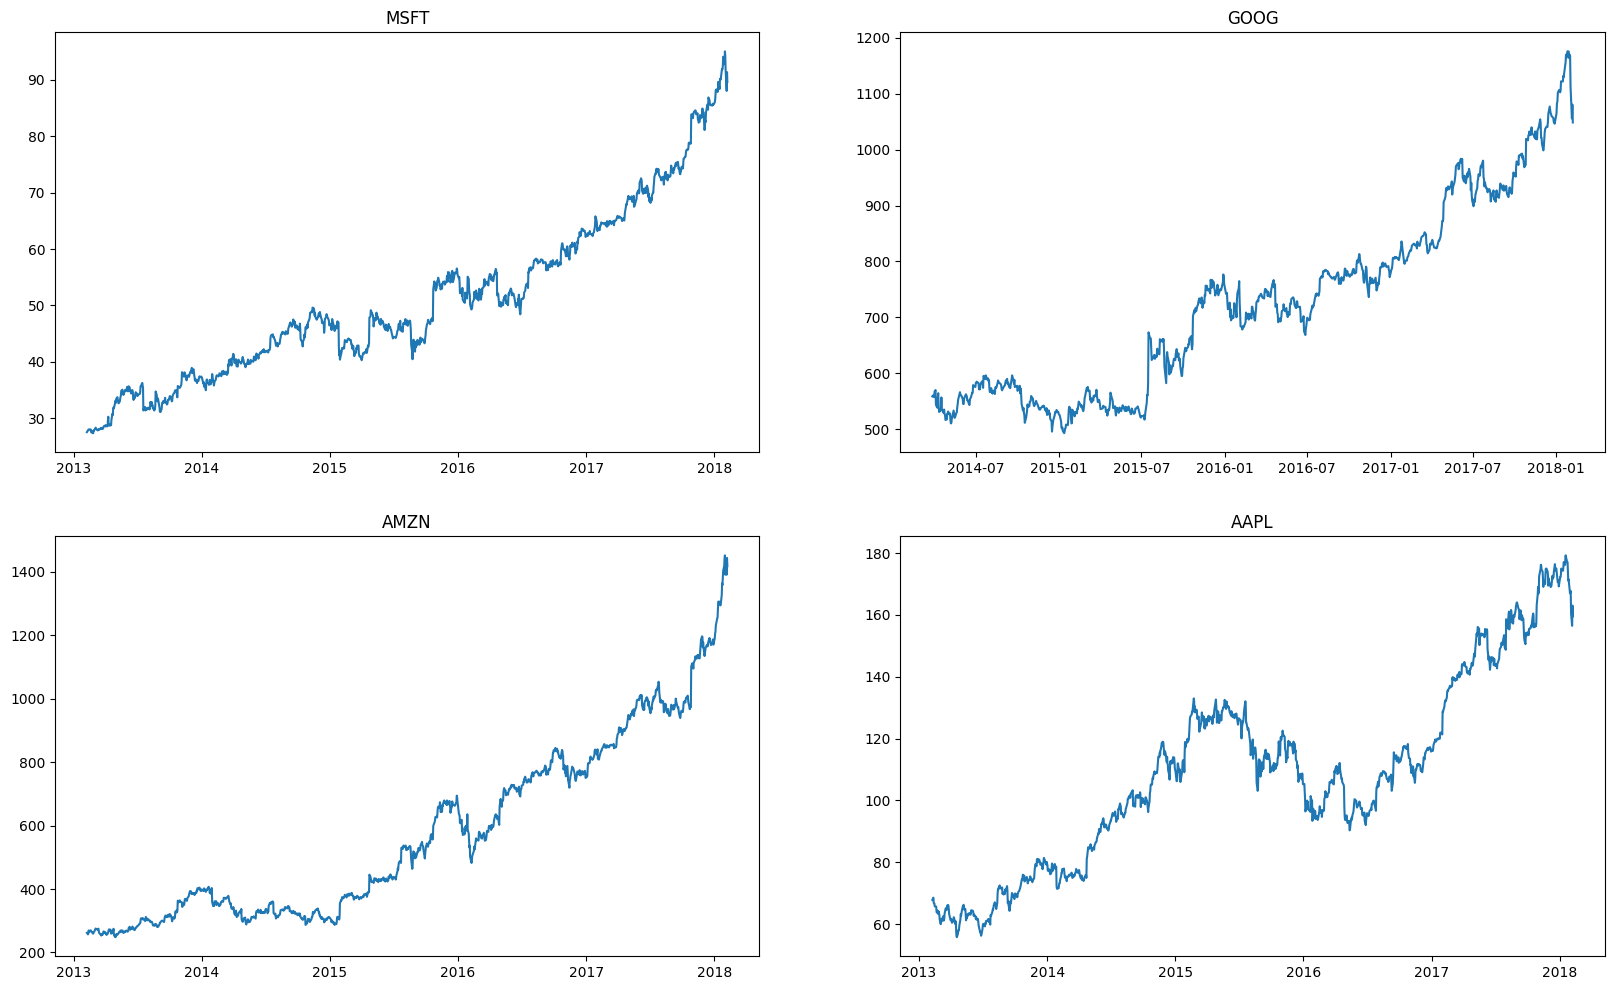

In [ ]:
# plot the change in price of each stock over time
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list, 1):
  plt.subplot(2, 2, index)
  filter1 = all_data['Name']==company
  df = all_data[filter1]
  plt.plot(df['date'], df['close'])
  plt.title(company)

In [ ]:
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL


#2- Whats the moving average of the various stocks?

In [ ]:
new_data = all_data.copy()

In [ ]:
# list of moving average days
ma_day = [10, 20, 50]

# calculate and append moving averages to the DataFrame
for ma in ma_day:

  new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [ ]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640


In [ ]:
new_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

In [ ]:
new_data.set_index('date', inplace = True)

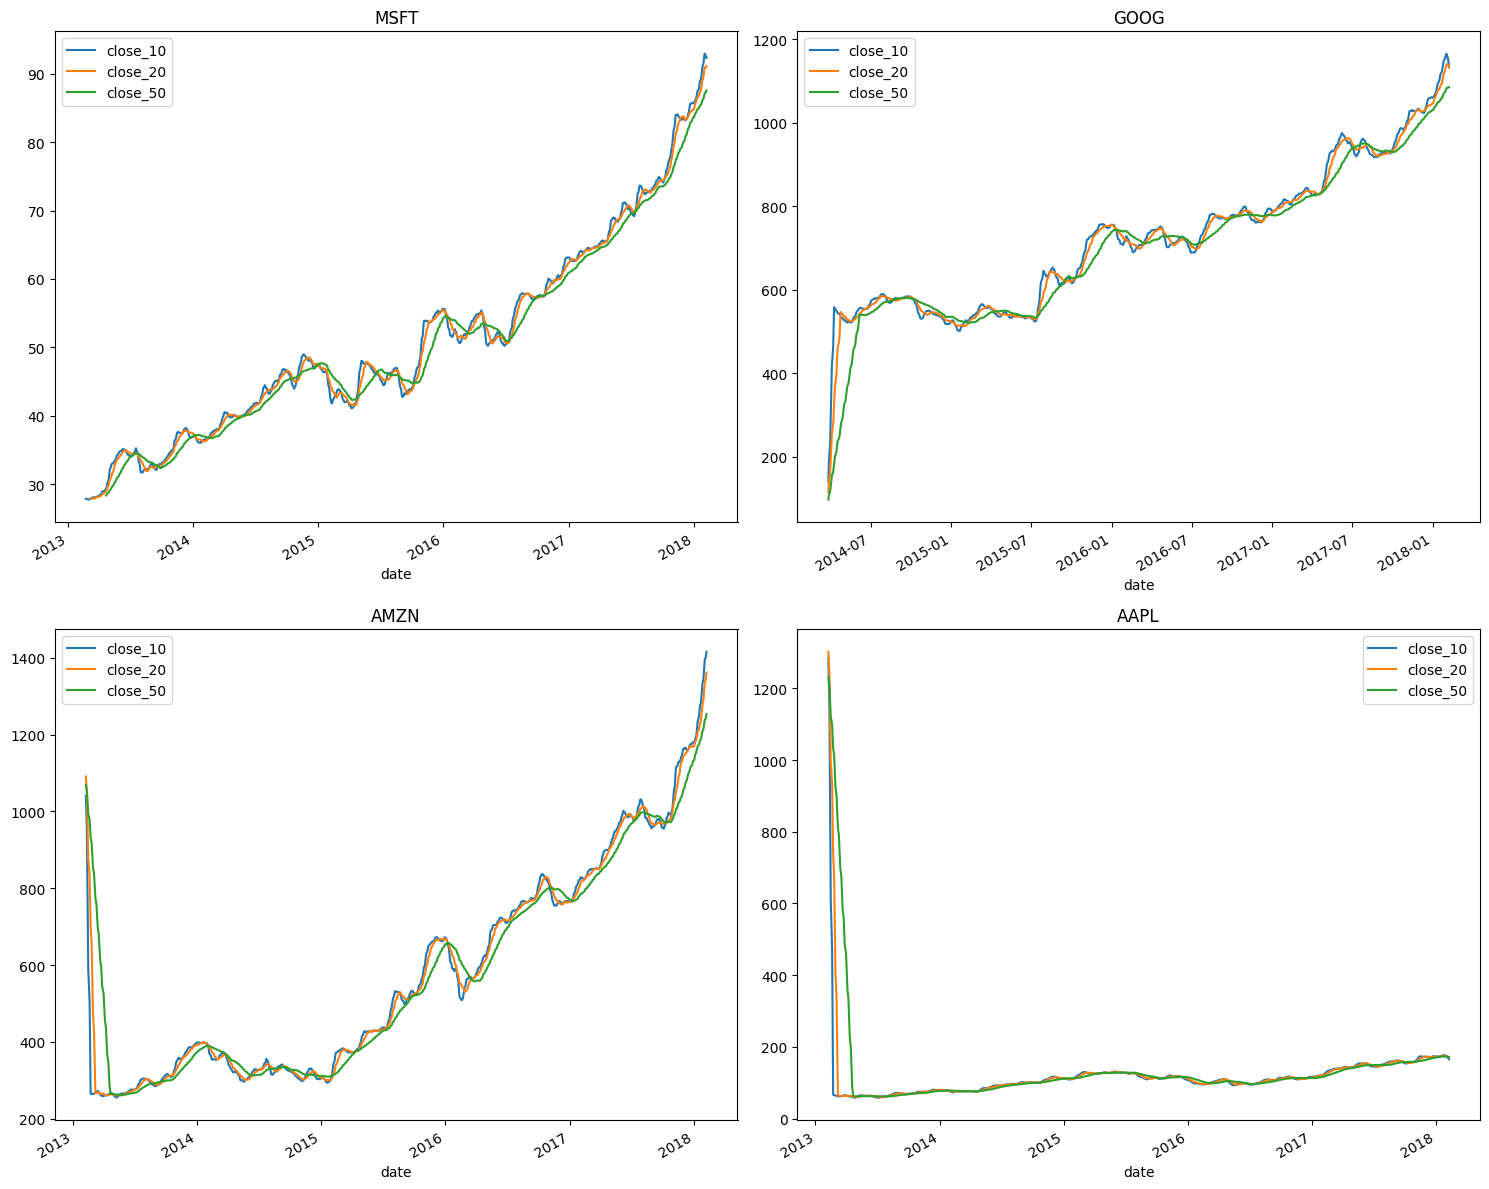

In [ ]:
# plot the moving averages for each stock
plt.figure(figsize = (15,12))
for index, company in enumerate(tech_list, 1):
  plt.subplot(2, 2, index)
  filter1 = new_data['Name']==company
  df = new_data[filter1]
  df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
  plt.title(company)
  plt.tight_layout()

#3- Analyze closing price change in apple stock !

In [ ]:
# read Apple stock data
apple = pd.read_csv('individual_stocks_5yr/AAPL_data.csv')

In [ ]:
# calculate daily percentage change in closing price
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

In [ ]:
# plot the daily percentage change
px.line(apple, x = 'date' , y = 'Daily return(in %)')

#4- Perform resample analysis of closing price

In [ ]:
# convert 'date' column to datetime format and set it as index
apple['date'] =pd.to_datetime(apple['date'])
apple.set_index('date', inplace=True)

In [ ]:
# resample the closing price by month and plot
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

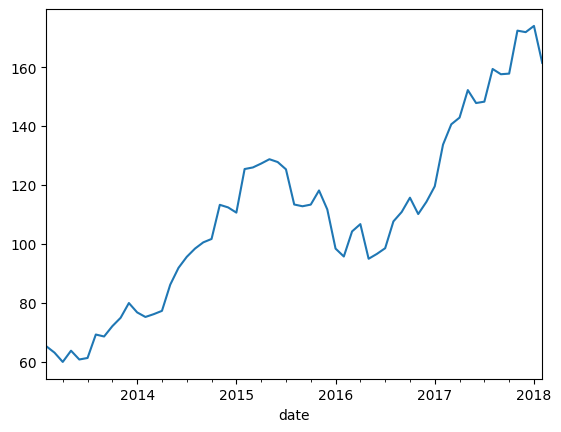

In [ ]:
apple['close'].resample('M').mean().plot()

In [ ]:
# Resample the closing price by year and plot
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

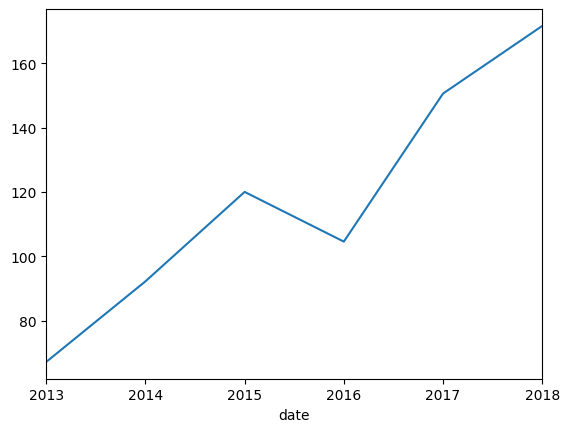

In [ ]:
apple['close'].resample('Y').mean().plot()

In [ ]:
# Resample the closing price by quarter and plot
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

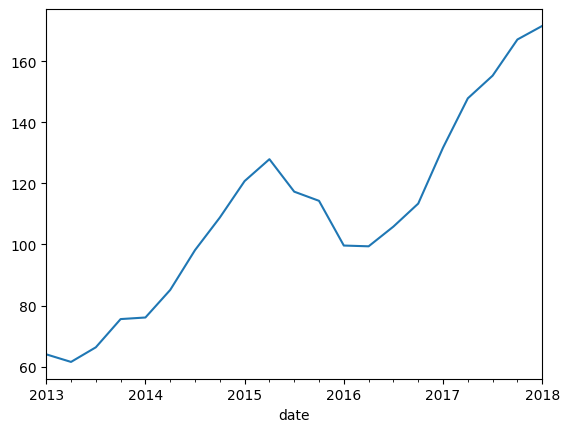

In [ ]:
apple['close'].resample('Q').mean().plot()

#5- Check whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not!

In [ ]:
company_list

['individual_stocks_5yr/AAPL_data.csv',
 'individual_stocks_5yr/AMZN_data.csv',
 'individual_stocks_5yr/GOOG_data.csv',
 'individual_stocks_5yr/MSFT_data.csv']

In [ ]:
apple = pd.read_csv(company_list[0])
amazon = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [ ]:
closing_price = pd.DataFrame()

In [ ]:
# create dataframe with closing prices of each company
closing_price['apple_close'] = apple['close']
closing_price['amazon_close'] = amazon['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [ ]:
closing_price.head()

,apple_close,amazon_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


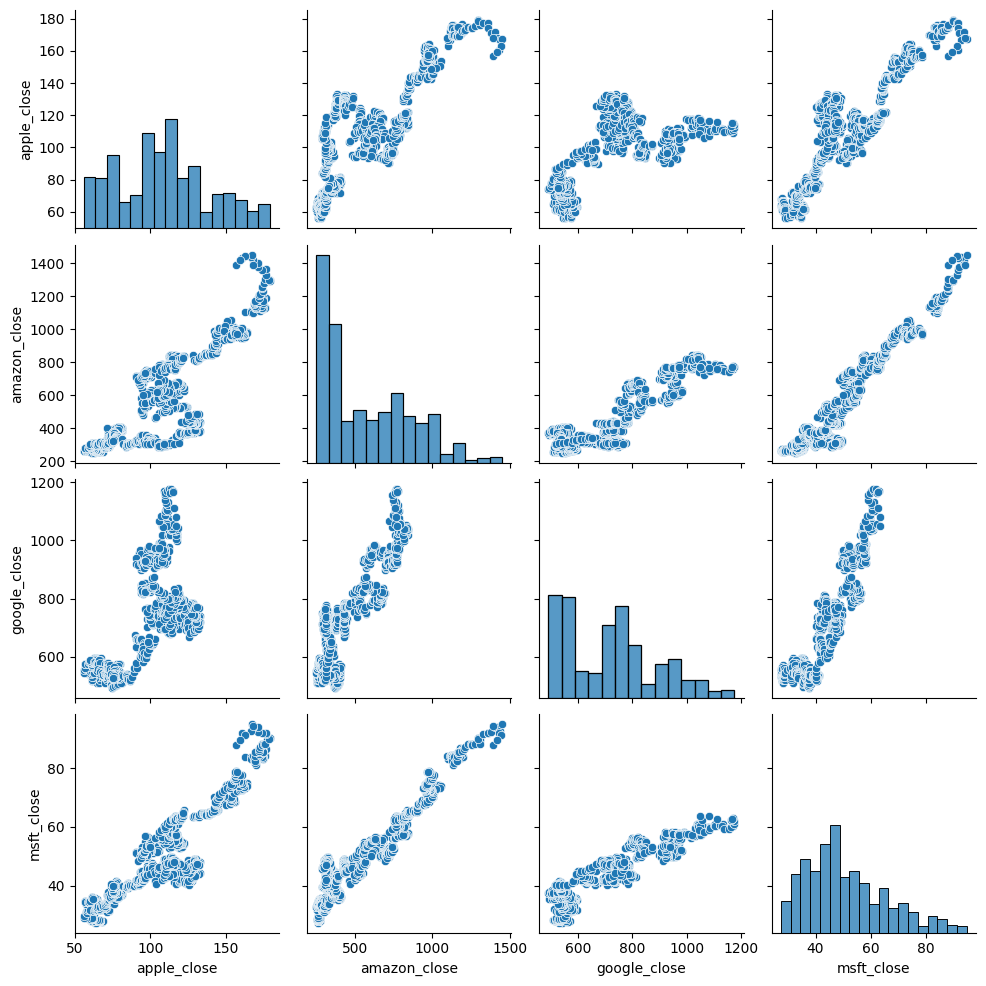

In [ ]:
# visualize pairwise relationships between closing prices
sns.pairplot(closing_price)
# amazon and msft have high correlation

<Axes: >

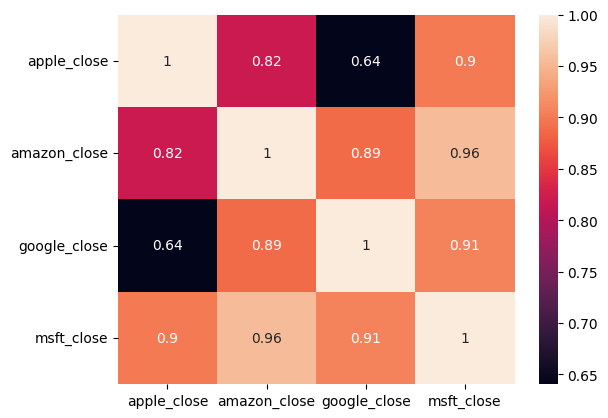

In [ ]:
# visualize correlation heatmap
sns.heatmap(closing_price.corr() , annot=True)
# closing price of Google and Microsoft have a correlation of 0.91
# closing price of Amazon and Microsoft have a correlation of 0.96

#6- Analyse whether daily change in closing price of stocks or daily returns in stock are correlated or not!

In [ ]:
# create a dataframe to store daily percentage change in closing prices
closing_pct_change = pd.DataFrame()
# Calculate daily percentage change
for col in closing_price.columns:
  closing_pct_change[col+'_pct_change'] = closing_price[col].pct_change() * 100

In [ ]:
closing_pct_change

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,0.000000,-0.789391
1255,-4.339015,2.874101,0.000000,-2.631021
1256,-2.498442,-2.793804,0.000000,-4.118544
1257,4.179181,3.801439,0.000000,3.784091


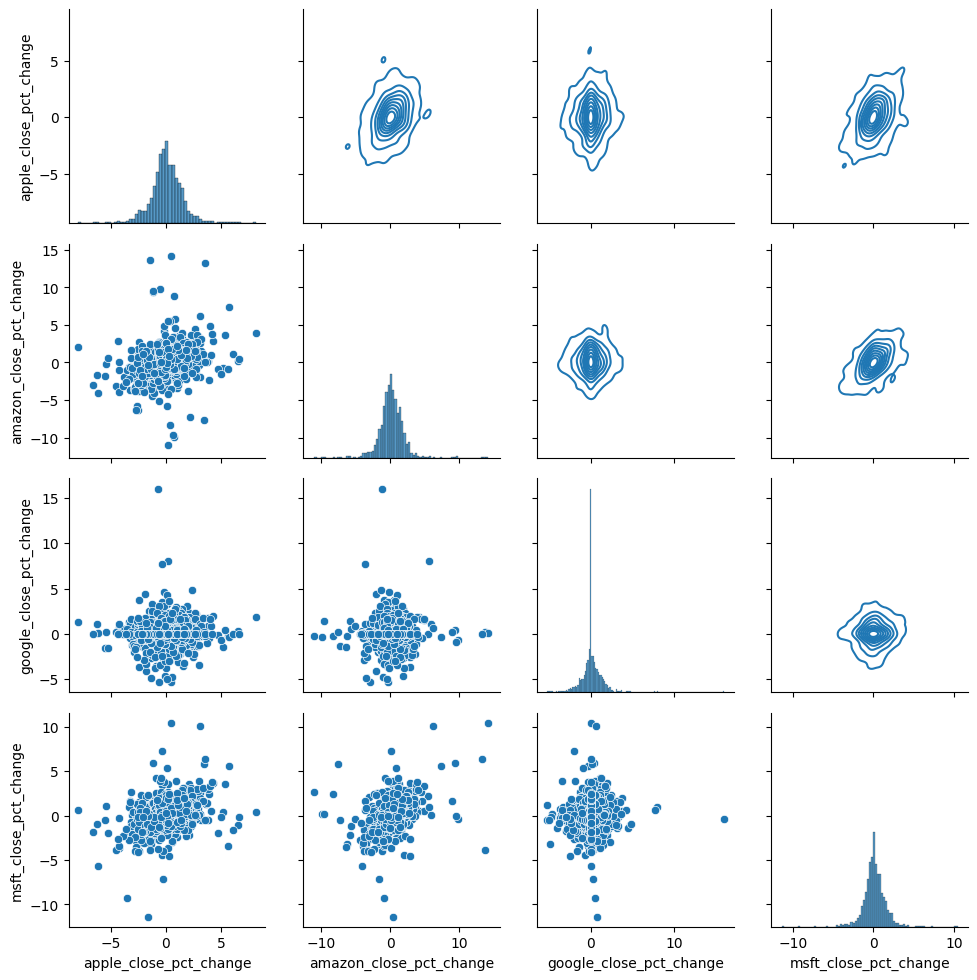

In [ ]:
# visualize pairplot for daily percentage change
g = sns.PairGrid(data = closing_pct_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
# AAPL_close_pct_change and AMZN_close_pct_change shows a linear relationship upto some extent.

In [ ]:
closing_pct_change.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.032996,0.366598
amazon_close_pct_change,0.287659,1.000000,0.025323,0.402678
google_close_pct_change,0.032996,0.025323,1.000000,0.036436
msft_close_pct_change,0.366598,0.402678,0.036436,1.000000
